## Basit Doğrusal Regresyon

### Model

In [2]:
import pandas as pd
df = pd.read_csv("./Advertising.csv")
df = df.iloc[:,1:len(df)]# index problemini gidermek için
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


TV, Radyo, Gazeteye yapılan reklam harcamaları sonucundaki satışları gösteren verisetidir. 
Basit lineer regresyon ile ilgilendiğimiz için değişkenlerden birini seçeceğiz.
* Amacımız TV harcamaları ile satışları modellemek.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


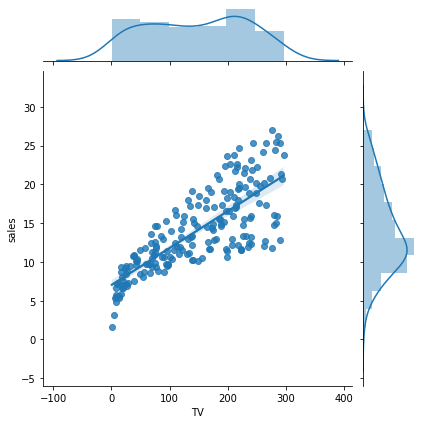

In [6]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df, kind ="reg");

         TV harcamaları ile satış arasında doğru bir orantı olduğu gözlemlenmektedir.

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
X = df[["TV"]]
y = df[["sales"]]

In [5]:
reg = LinearRegression()  #regresyon nesnesi oluşturuldu.

In [6]:
model = reg.fit(X,y)

In [7]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
dir(model)  # Beta1 = coef_'i ifade eder B0 ise intercept_

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [8]:
model.intercept_

array([7.03259355])

In [9]:
model.coef_

array([[0.04753664]])

In [18]:
#Rkare modelin skorunu belirler. 
#Satışlardaki değişikliğin 0.611 ını bağımsız değişkenimiz açıklar.
model.score(X,y)

0.611875050850071

### Tahmin

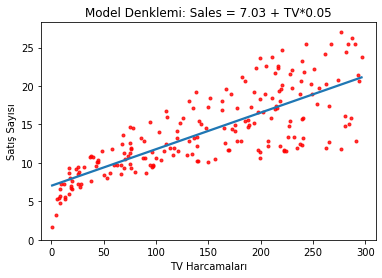

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"], ci=None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

                  Sales = 7.03 + 0.05*TV

In [13]:
# eğer 165 birim harcama yaparsak kaç birim satış yapar?
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [12]:
model.predict([[165]])

array([[14.87613922]])

In [14]:
yeni_veri = [[5],[15],[30]]
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [17]:
model.predict([[400]]) # veride olmayan değeri bile tahmin
#ettik. çünkü modelleme ve pattern elde etme bu demektir.

array([[26.04724972]])